# importing neccesary libraries


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Data Collection

In [3]:

stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-12-31'
data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249031,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536903,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114868,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771019,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941650,132079200
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,174.518234,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.527756,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.498154,79144300


In [5]:
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249031,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536903,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114868,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771019,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941650,132079200


In [6]:
data.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,175.850006,176.850006,175.270004,176.279999,174.518234,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.527756,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.498154,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,177.587265,62348900
2021-12-30,179.470001,180.570007,178.089996,178.199997,176.419052,59773000


In [7]:
data.shape

(504, 6)

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2020-01-02 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       504 non-null    float64
 1   High       504 non-null    float64
 2   Low        504 non-null    float64
 3   Close      504 non-null    float64
 4   Adj Close  504 non-null    float64
 5   Volume     504 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


In [9]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,117.900437,119.340968,116.528070,118.005079,116.198917,1.242302e+08
std,29.362344,29.495388,29.174470,29.349252,29.298689,6.316090e+07
min,57.020000,57.125000,53.152500,56.092499,54.848965,4.100000e+07
25%,91.272499,92.881876,90.824377,91.526875,89.740061,8.119942e+07
50%,123.705002,125.080002,122.174999,123.645000,121.853481,1.088506e+08
75%,139.657505,142.164997,138.295002,140.960003,139.347874,1.478633e+08
max,181.119995,182.130005,178.529999,180.330002,178.527756,4.265100e+08


In [10]:
corr=data.corr()
corr


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999205,0.998860,0.997941,0.997905,-0.534142
High,0.999205,1.000000,0.998669,0.998941,0.998902,-0.520542
Low,0.998860,0.998669,1.000000,0.998988,0.999005,-0.552180
Close,0.997941,0.998941,0.998988,1.000000,0.999977,-0.537559
Adj Close,0.997905,0.998902,0.999005,0.999977,1.000000,-0.538017
Volume,-0.534142,-0.520542,-0.552180,-0.537559,-0.538017,1.000000


In [11]:
data.isnull().any()
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Data Preprocessing

In [12]:

data = data.dropna()
sequence_length = 10
X, y = [], []


In [13]:
# Create sequences for training
for i in range(len(data) - sequence_length):
    X.append(data['Close'].values[i:i+sequence_length])
    y.append(data['Close'].values[i+sequence_length])

X = np.array(X)
y = np.array(y)


In [14]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Selection & Model Training

In [15]:

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [16]:

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
13/13 [==============================] - 1s 25ms/step - loss: 12908.4658 - val_loss: 10385.7559
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 9077.4219 - val_loss: 7702.2715
Epoch 3/10
13/13 [==============================] - 0s 9ms/step - loss: 5111.7119 - val_loss: 752.1360
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 222.5198 - val_loss: 44.6495
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 49.0699 - val_loss: 85.0274
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 24.2918 - val_loss: 6.3890
Epoch 7/10
13/13 [==============================] - 0s 9ms/step - loss: 12.4535 - val_loss: 6.1421
Epoch 8/10
13/13 [==============================] - 0s 8ms/step - loss: 8.3742 - val_loss: 6.2950
Epoch 9/10
13/13 [==============================] - 0s 8ms/step - loss: 7.5438 - val_loss: 6.5381
Epoch 10/10
13/13 [==============================] - 0s 6ms/step - loss: 6.9656 - val_loss:

In [17]:

# Model Evaluation
score = model.evaluate(X_test, y_test)
print(f"Test loss: {score}")


4/4 [==============================] - 0s 3ms/step - loss: 7.2270
Test loss: 7.227017402648926


In [18]:
# Model Predictions
predictions = model.predict(X_test)



4/4 [==============================] - 0s 4ms/step


# Data Visualization

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


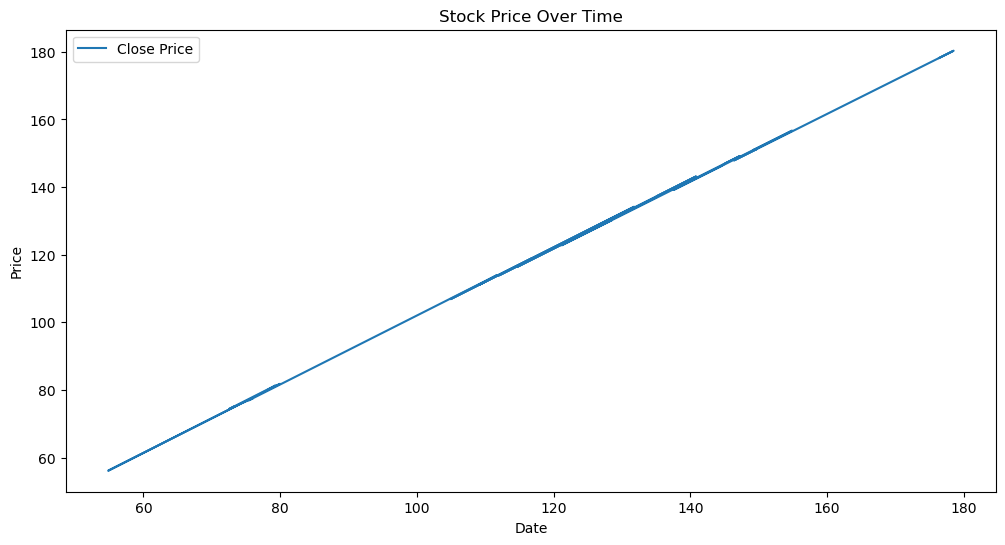

In [19]:

# Plot stock price data
# Check the column names in your DataFrame
print(data.columns)
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], data['Close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


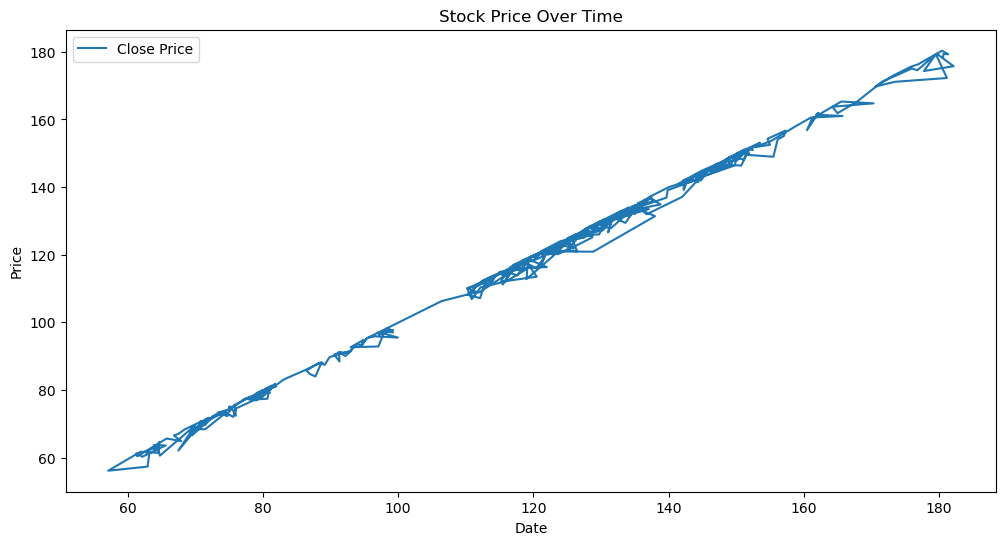

In [20]:
print(data.columns)
plt.figure(figsize=(12, 6))
plt.plot(data['High'], data['Close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


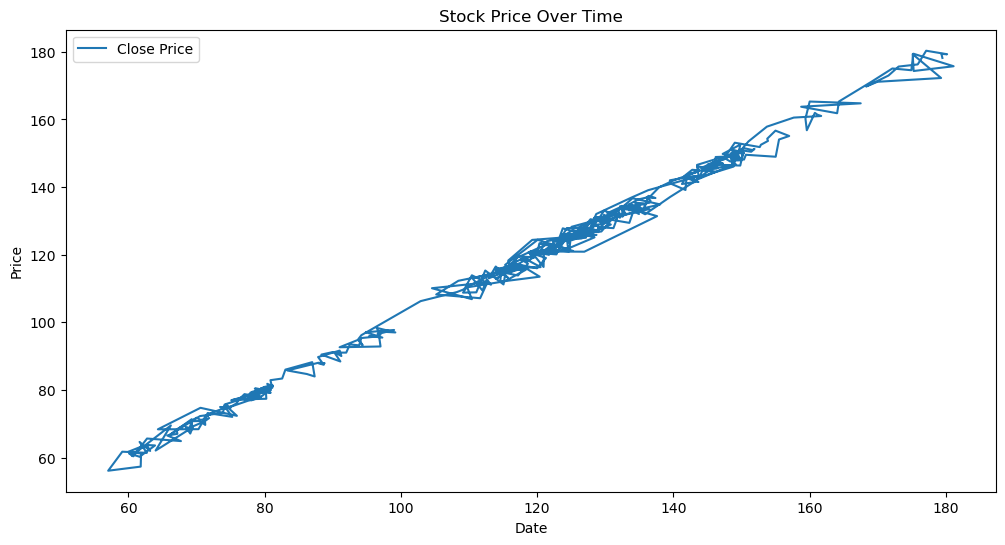

In [21]:
print(data.columns)
plt.figure(figsize=(12, 6))
plt.plot(data['Open'], data['Close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


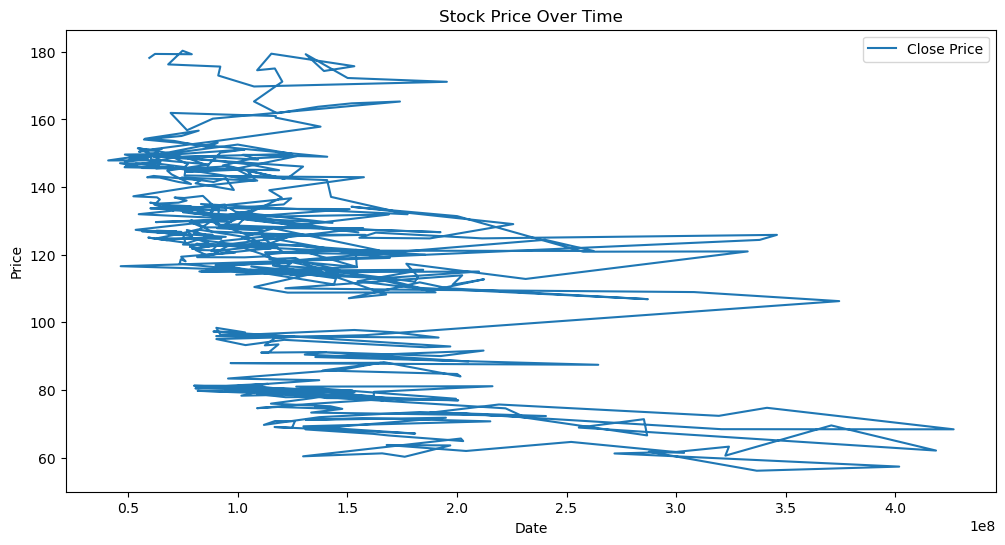

In [22]:
print(data.columns)
plt.figure(figsize=(12, 6))
plt.plot(data['Volume'], data['Close'], label='Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

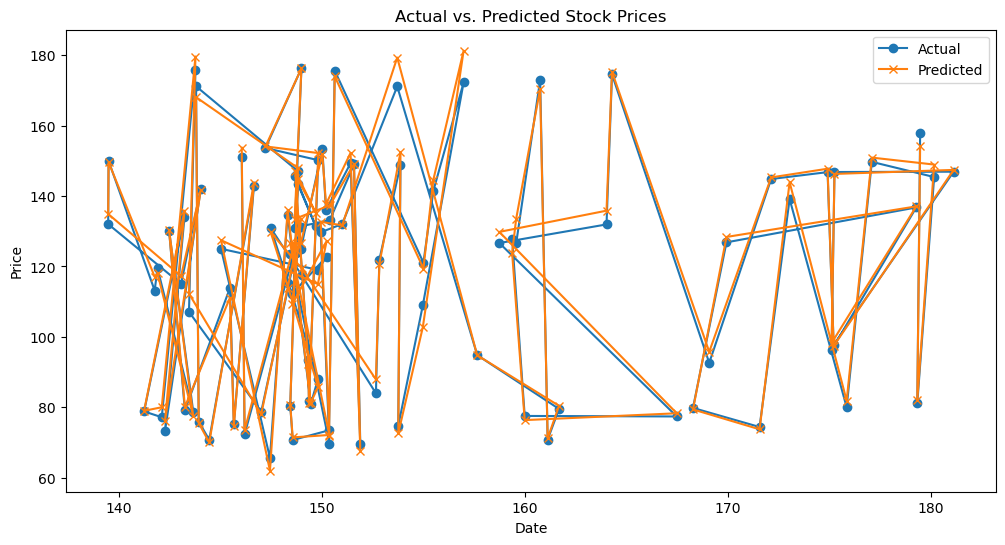

In [23]:
# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(data['Open'][-len(y_test):], y_test, label='Actual', marker='o')
plt.plot(data['Open'][-len(y_test):], predictions, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

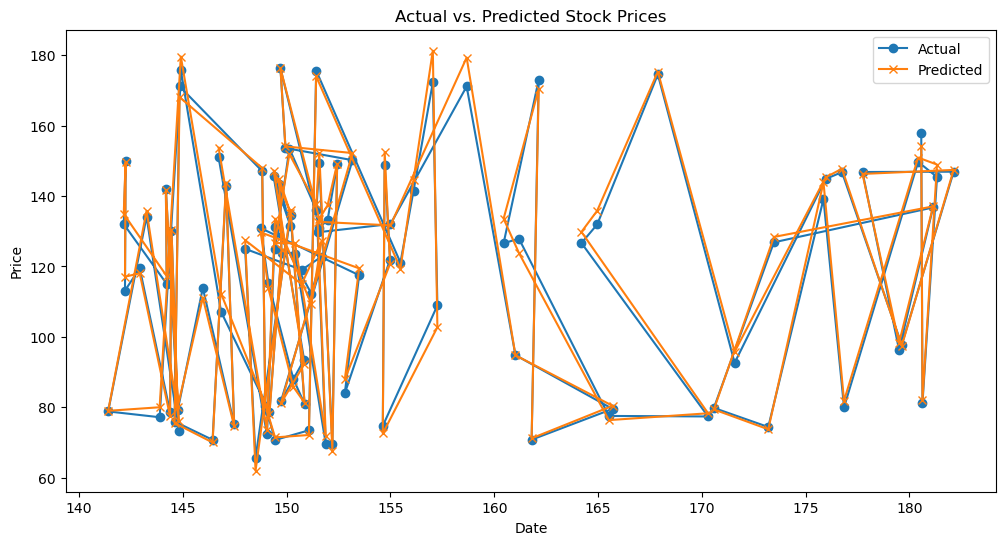

In [24]:
# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(data['High'][-len(y_test):], y_test, label='Actual', marker='o')
plt.plot(data['High'][-len(y_test):], predictions, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

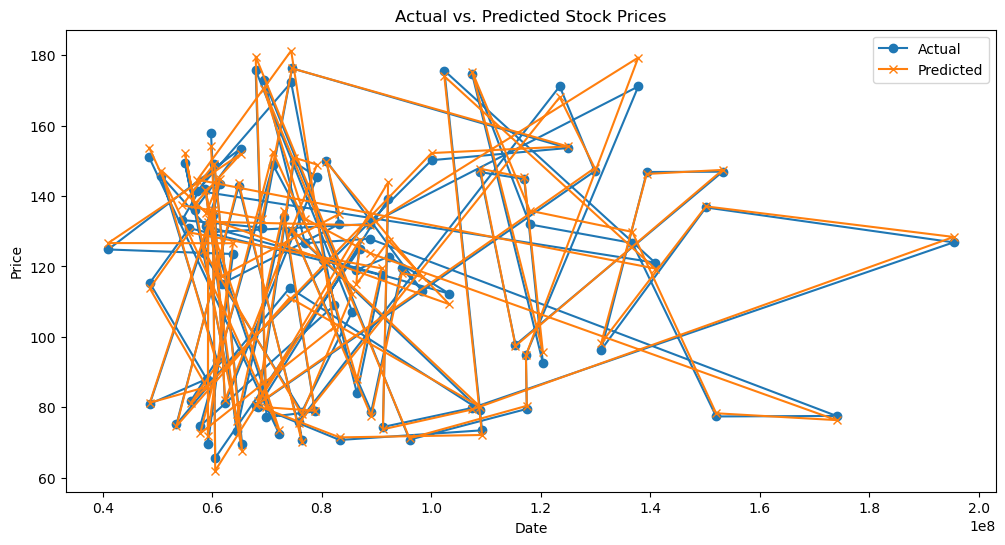

In [25]:
# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(data['Volume'][-len(y_test):], y_test, label='Actual', marker='o')
plt.plot(data['Volume'][-len(y_test):], predictions, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()